In [122]:
import os.path
import math
%matplotlib inline
%matplotlib qt

In [134]:
prefix = 'uf6_ano_rcc_vdzp'
taus = ['1e-8', '1e-6', '1e-4']                                                 
useGenConTr = ['libints', 'libintg']                                                     
sigmas = ['1e-1','5e-2','1e-2','5e-3','1e-3','5e-4']                            
maxquals = [1000, 500, 2000, 200, 5000, 100, 50, 20, 1, 20000] 
maxquals_sorted = sorted(maxquals)
maxquals_small = [1000, 500, 200, 100, 50, 20, 1] 
root = '/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/'

[1, 20, 50, 100, 200, 500, 1000, 2000, 5000, 20000]


In [124]:
 %matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.ticker import NullLocator
matplotlib.rcParams['pdf.fonttype'] = 42
rgb_colors = [(  0, 78,139), # Dark blue
              (  0,130,183), # Blue
              ( 97,202,228), # Light blue
              (255,205, 65), # Dark yellow
              (225, 27, 46), # Reddish
              (  0,  0,  0), # Black
             ]

colors = []
for c in rgb_colors:
    colors.append(tuple([float(p) / 255.0 for p in c]))
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = [3.25, 3.5]

In [125]:
def latexScientific(x):
    s = '%.2e' % (x,)
    s = '$' + s.replace('e+0',r'\times 10^{') + '}$'
    return s

In [126]:
def parseOut(fname):
    sfTimes = {}
    if not os.path.exists(fname):
        return None
    f = open(fname)
    for line in f:
        # TIMING IN FIRST STEP
        if 'Cholesky-RI-Pivots-ERI count' in line:
            sfTimes['NERI1'] = int(line.split('= ')[-1])
            
        if 'Cholesky-RI-Pivots-ERI duration' in line:
            sfTimes['ERI1'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-ERIvec duration     =' in line:
            sfTimes['ERIvec'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-ERIcopy duration    =' in line:
            sfTimes['ERIcopy'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-ERItrans duration   =' in line:
            sfTimes['ERItrans'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-CDalgMM duration    =' in line:
            sfTimes['CDalgMM'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-CDalgMV duration    =' in line:
            sfTimes['CDalgMV'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-Shrink count        =' in line:
            sfTimes['Shrink count'] = int(line.split('= ')[-1])
            
        if 'Cholesky-RI-Shrink duration     =' in line:
            sfTimes['Shrink'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-misc duration       =' in line:
            sfTimes['misc'] = float(line.split('= ')[-1].split()[0])
            
            
        if 'Cholesky-RI-Dynamic-ERI-Pivots duration =' in line:
            sfTimes['T1'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI auxiliary dimension =' in line:
            sfTimes['Aux dim'] = int(line.split('= ')[-1])
        
        
        
        # TIMING IN SECOND STEP
        if 'Cholesky-RI-PivotRI-ERI count       = ' in line:
            sfTimes['NERI2'] = int(line.split('= ')[-1])
            
        if 'Cholesky-RI-PivotRI-ERI duration    =' in line:
            sfTimes['ERI2'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-PivotRI-3index duration =' in line:
            sfTimes['PivotRI-3index'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-PivotRI-2index duration =' in line:
            sfTimes['PivotRI-2index'] = float(line.split('= ')[-1].split()[0])
            
        if 'RI-ERI3-Transformation-Cholesky duration =' in line:
            sfTimes['Trans-Cholesky'] = float(line.split('= ')[-1].split()[0])
            
        if 'RI-ERI3-Transformation-TriInv duration   =' in line:
            sfTimes['Trans-TriInv'] = float(line.split('= ')[-1].split()[0])
            
        if 'RI-ERI3-Transformation-Gemm duration     =' in line:
            sfTimes['Trans-Gemm'] = float(line.split('= ')[-1].split()[0])
            
        if 'RI-ERI3-Transformation-Copy duration     =' in line:
            sfTimes['Trans-Copy'] = float(line.split('= ')[-1].split()[0])
            
        if 'RI-ERI3-Transformation duration =' in line:
            sfTimes['Trans'] = float(line.split('= ')[-1].split()[0])
            
        if 'Cholesky-RI-PivotRI duration =' in line:
            sfTimes['T2'] = float(line.split('= ')[-1].split()[0])
            
            
        if 'Cholesky-RI duration =' in line:
            sfTimes['TotalT'] = float(line.split('= ')[-1].split()[0])
    f.close()
    return sfTimes

In [127]:
times = {}

for gen in useGenConTr:
    for tau in taus:
        for sigma in sigmas:
            for maxqual in maxquals:

                fname = root + prefix

                fname += '_%s_t%s_s%s_m%d' % (gen,tau,sigma,maxqual)

                fname += '.out'
                
                print(fname)

                times[(gen,tau,sigma,maxqual)] = parseOut(fname)

/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m1000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m500.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m2000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m200.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m5000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m100.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m50.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m20.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-8_s1e-1_m1.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1

/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m1000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m500.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m2000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m200.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m5000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m100.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m50.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m20.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1e-6_s5e-4_m1.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libints_t1

/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s1e-2_m20000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m1000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m500.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m2000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m200.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m5000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m100.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m50.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-8_s5e-3_m20.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libint

/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-6_s5e-4_m20000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m1000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m500.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m2000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m200.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m5000.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m100.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m50.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libintg_t1e-4_s1e-1_m20.out
/Users/aodongliu/LiGroup/CD/tune_param/uf6/ano_rcc_vdzp/uf6_ano_rcc_vdzp_libint

In [128]:
times

{('libints', '1e-8', '1e-1', 1000): {'NERI1': 319480197,
  'ERI1': 485.39,
  'ERIvec': 30.931,
  'ERIcopy': 0.10685,
  'ERItrans': 0.092315,
  'CDalgMM': 0.14569,
  'CDalgMV': 0.089968,
  'Shrink count': 13,
  'Shrink': 0.22259,
  'misc': 5.7401,
  'T1': 37.329,
  'NERI2': 306954420,
  'ERI2': 458.6,
  'PivotRI-3index': 26.08,
  'PivotRI-2index': 0.0086536,
  'Trans-Cholesky': 0.033597,
  'Trans-TriInv': 0.045716,
  'Trans-Gemm': 0.1511,
  'Trans-Copy': 0.10491,
  'Trans': 0.33549,
  'T2': 26.425,
  'TotalT': 71.281},
 ('libints', '1e-8', '1e-1', 500): {'NERI1': 303998234,
  'ERI1': 481.93,
  'ERIvec': 32.184,
  'ERIcopy': 0.040981,
  'ERItrans': 0.026285,
  'CDalgMM': 0.12614,
  'CDalgMV': 0.082321,
  'Shrink count': 18,
  'Shrink': 0.35724,
  'misc': 6.0595,
  'T1': 38.876,
  'NERI2': 307047075,
  'ERI2': 460.0,
  'PivotRI-3index': 26.358,
  'PivotRI-2index': 0.0059154,
  'Trans-Cholesky': 0.0098249,
  'Trans-TriInv': 0.01411,
  'Trans-Gemm': 0.303,
  'Trans-Copy': 0.094778,
  'Trans

<IPython.core.display.Javascript object>


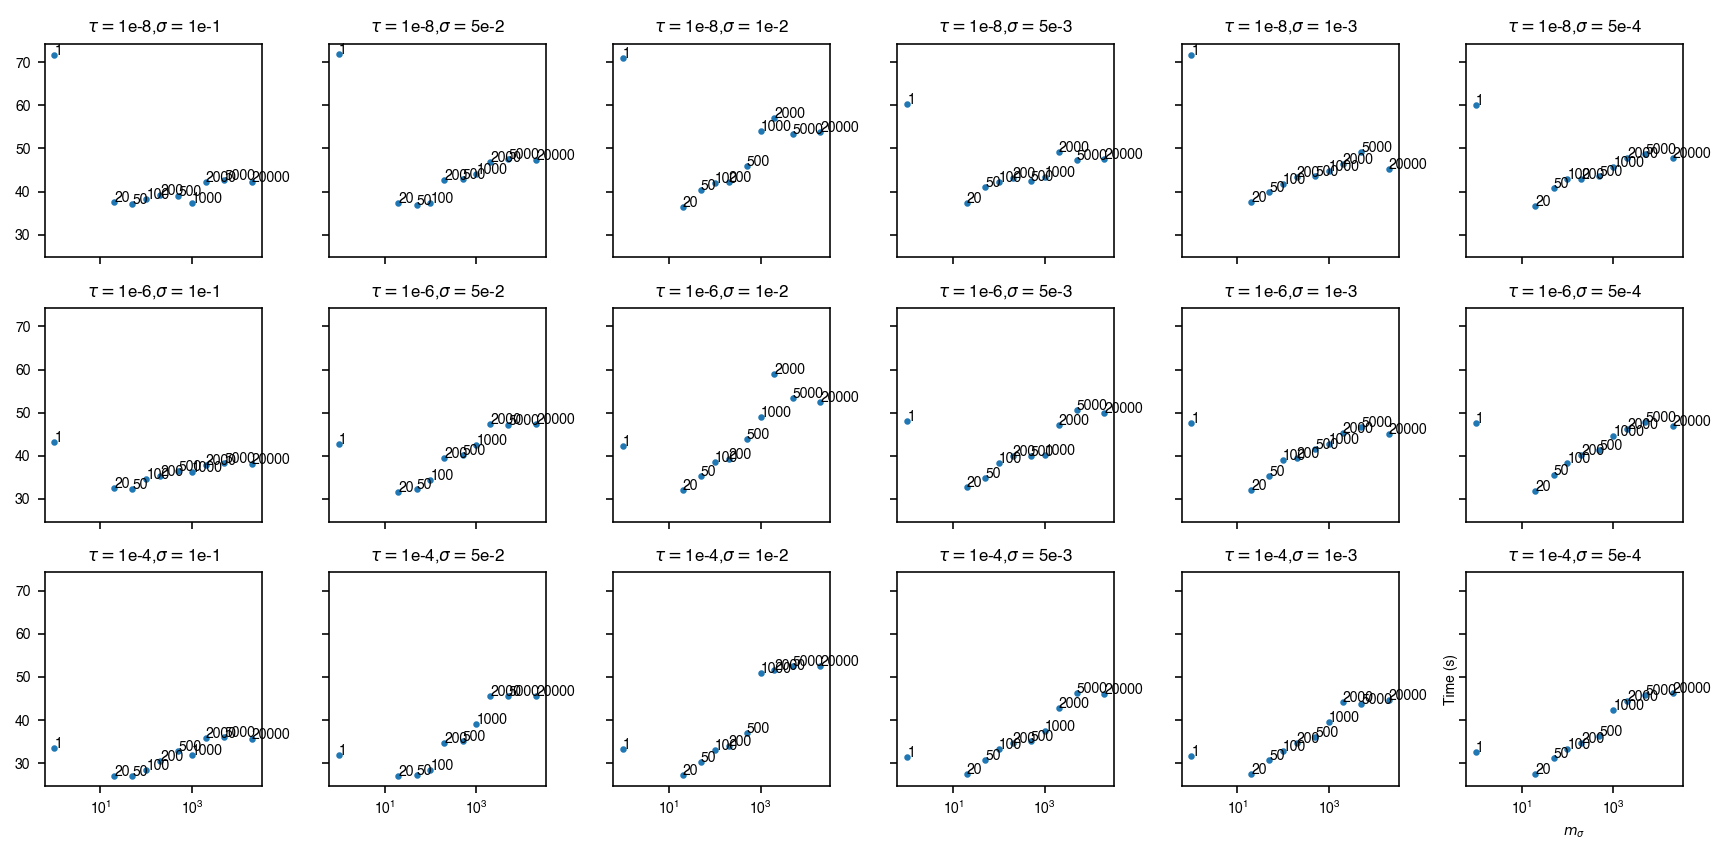

----------------------------------------------------------------------------------------------------
----------------------------------------------LIBINTG-----------------------------------------------
----------------------------------------------------------------------------------------------------


In [129]:
# Plot the effect of m_sigma, libintG
gen = 'libints'
fig, ax = plt.subplots(3,6,sharex=True, sharey=True,figsize=(12,6))
row = -1
column = -1
print('----------------------------------------------------------------------------------------------------')
print('----------------------------------------------LIBINTG-----------------------------------------------')
print('----------------------------------------------------------------------------------------------------')
for tau in taus:
    column = -1
    row += 1
#     print('\n')
#     print('\n')
#     print('----------------------------------------------',gen,tau, '----------------------------------------------')
    
    for sigma in sigmas:
        column += 1
        T1 = []
#         print('\n')
#         print('----------',gen,tau,sigma,  '----------')
        for maxqual in maxquals_small:
            T1.append(times[(gen,tau,sigma,maxqual)]['T1'])
        
        ax[row,column].scatter(maxquals_small,T1, s=5)
        ax[row,column].set_xscale("log")
        subplot_title = "$\\tau=$" + str(tau) + ",$\sigma=$" + str(sigma)
        ax[row,column].set_title(subplot_title)
        #ax[row,column].set_xticks(maxquals_small)
        for i, txt in enumerate(maxquals_small):
            ax[row,column].annotate(txt, (maxquals_small[i], T1[i]))

plt.xlabel("$m_{\sigma}$")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.savefig('plot_msigma.pdf')
            

<IPython.core.display.Javascript object>


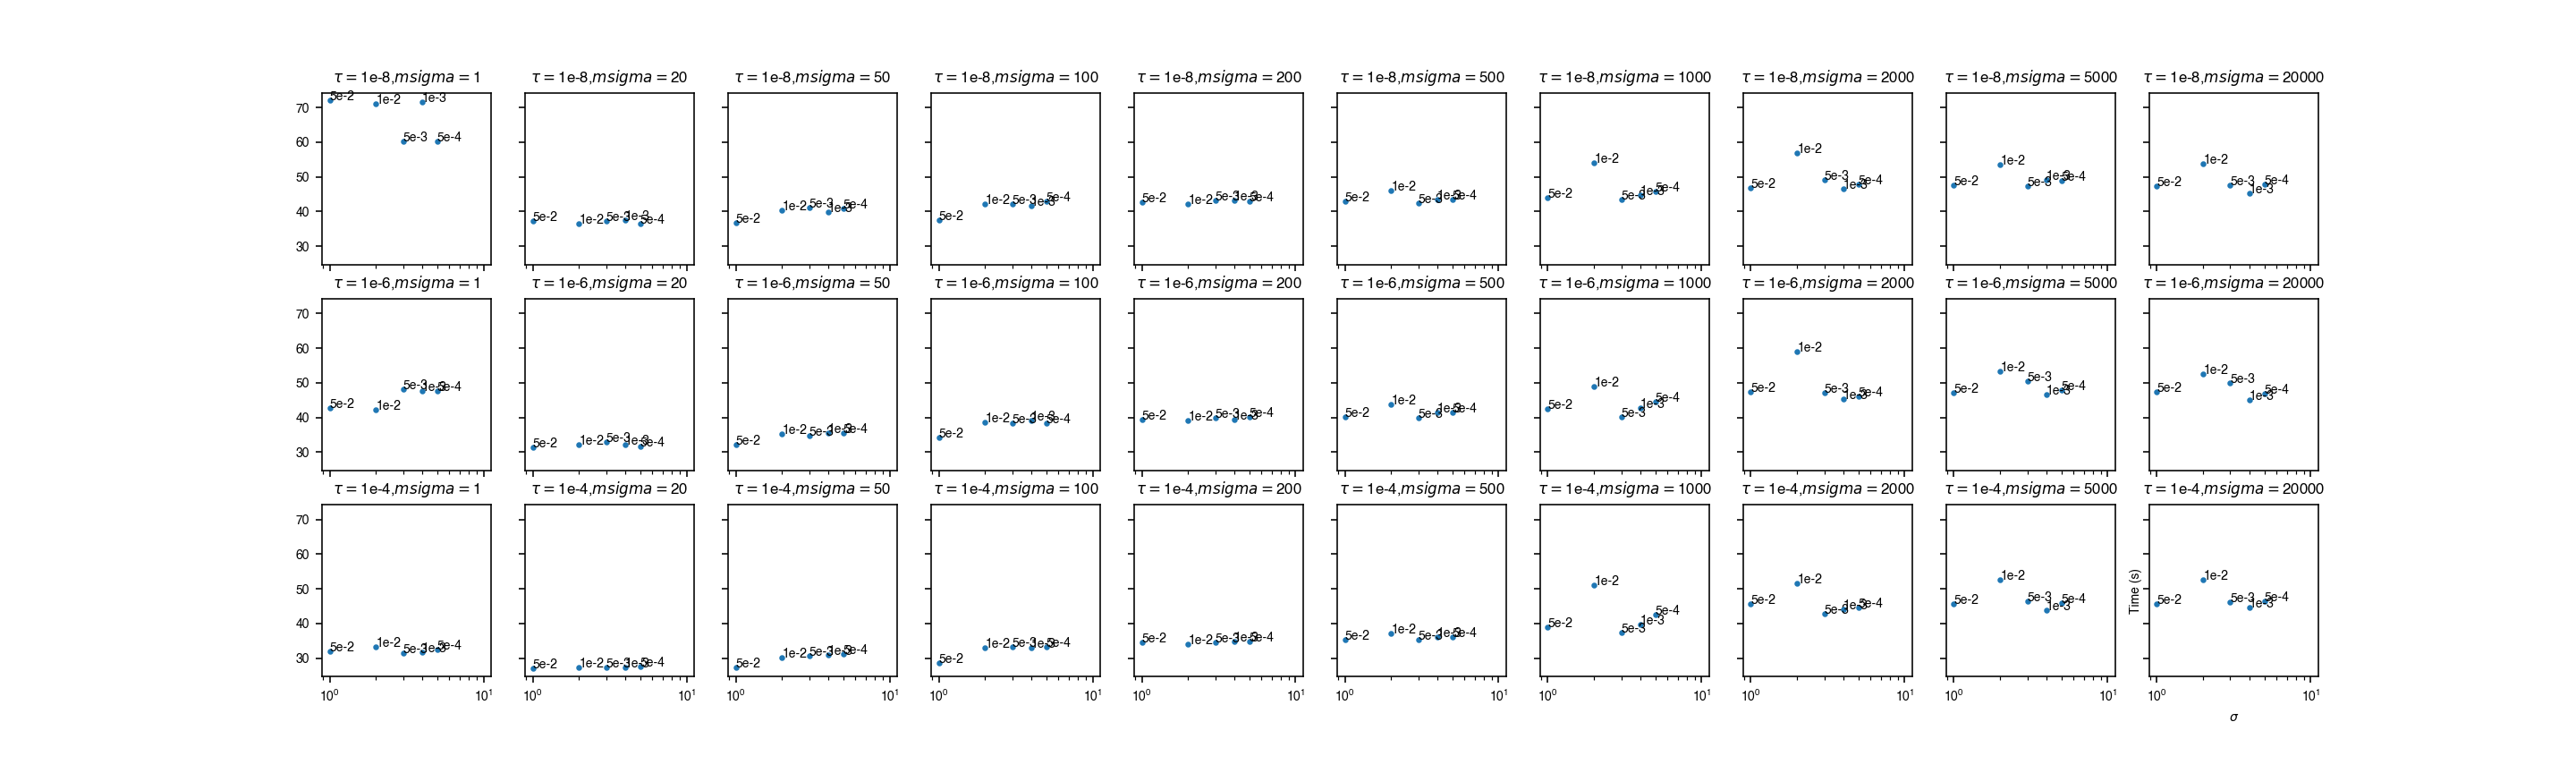

----------------------------------------------------------------------------------------------------
----------------------------------------------LIBINTG-----------------------------------------------
----------------------------------------------------------------------------------------------------


<ipython-input-135-390ab4d17435>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [135]:
# Plot the effect of sigma, libintG
gen = 'libints'
fig, ax = plt.subplots(3,10,sharex=True, sharey=True,figsize=(20,6))
row = -1
column = -1
print('----------------------------------------------------------------------------------------------------')
print('----------------------------------------------LIBINTG-----------------------------------------------')
print('----------------------------------------------------------------------------------------------------')
for tau in taus:
    column = -1
    row += 1
#     print('\n')
#     print('\n')
#     print('----------------------------------------------',gen,tau, '----------------------------------------------')
    
    for maxqual in maxquals_sorted:
        column += 1
        T1 = []
#         print('\n')
#         print('----------',gen,tau,sigma,  '----------')
        for sigma in sigmas:
            T1.append(times[(gen,tau,sigma,maxqual)]['T1'])
        
        ax[row,column].scatter(sigmas,T1, s=5)
        ax[row,column].set_xscale("log")
        subplot_title = "$\\tau=$" + str(tau) + ",$msigma=$" + str(maxqual)
        ax[row,column].set_title(subplot_title)
        #ax[row,column].set_xticks(maxquals_small)
        for i, txt in enumerate(sigmas):
            ax[row,column].annotate(txt, (sigmas[i], T1[i]))

plt.xlabel("$\sigma$")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.savefig('plot_sigma.pdf')